# A presentation about presentations

<span>Lab Meeting 8.6.2017 @ IKW Osnabrueck, Johannes Leugering</span>

In [1]:
%%html
<script>
var code_show=false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show;
};

$(document).ready(code_toggle());

</script>
<a href="javascript:code_toggle()" style="float: right">Toggle Input Cells</a>

## Capabilities of jupyter notebooks

* document code with MarkDown text, MathJax etc.
* run code
    * supports many languages, but most importantly python
* present results
    * depending on the type of result, it can be visualized nicely
    * output such as matplotlib figures are included as well
    * for custom data types, custom display methods can be defined (see e.g. `pandas.DataFrame` next slide)

### Example: Loading and displaying a dataset
#### How a pandas.DataFrame object is presented

In [2]:
from sklearn.datasets import load_iris
import pandas
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
from matplotlib import pyplot as pp, style, patheffects

iris = load_iris()
iris_data = pandas.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data["class id"] = iris.target
iris_data["class name"] = iris.target_names[iris.target]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class id,class name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


#### Figures can be rendered inline:

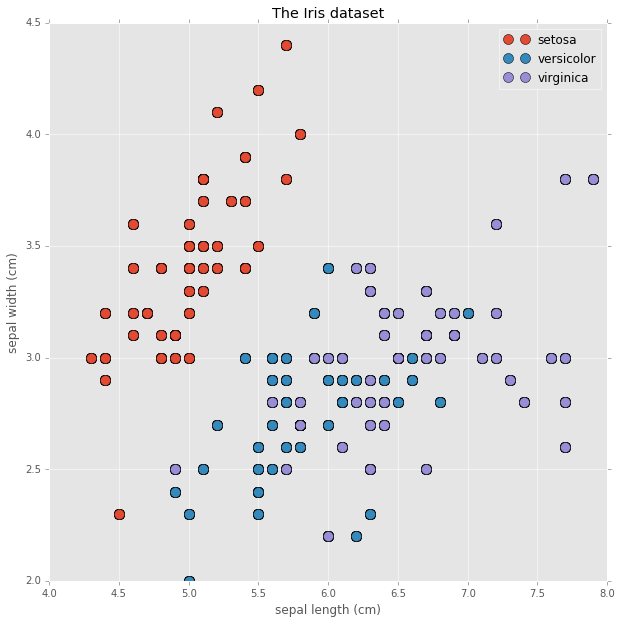

In [3]:
data = iris_data[["sepal length (cm)", "sepal width (cm)", "class name"]].copy()
data.columns = ["x", "y", "class"]

def plot_data(ax, data):
    all_pts = []
    for label in data["class"]:
        subset = data.where(lambda x: x["class"] == label)
        pts, = ax.plot(subset["x"], subset["y"], "o", markersize=10)
        all_pts.append(pts)
    return all_pts
    
fig = pp.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
pts = plot_data(ax, data)
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.set_title("The Iris dataset")
colors = [p.get_color() for p in pts]
colors = dict(zip(iris.target_names, colors))
ax.legend(pts, iris.target_names);

In [4]:
%%html
<script>
var code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
</script>
<a href="javascript:code_toggle()">Toggle Input Cells</a>

## "Inline" capabilities of Jupyter's MarkDown text

### Supports lists

* lists can be unordered
    * like this example
    * with a sublist
* lists can also be ordered
    1. like this list
        1. with this sub-example
        2. and this one

### Supports basic text formatting

You can write *cursive* and **bold** text, embed `monospace text`.  
Use double spaces at the end of a line to force a break, an empty line starts a new paragraph.

















You can embed block-quotes as in email:

> A SQL query goes into a bar, walks up to two tables and asks, "Can I join you?"


### Supports embedding/linking other content
embed links to other things ([e.g. the documentation of all the features](https://sourceforge.net/p/jupiter/wiki/markdown_syntax/)) or images in the local directory ![with alternative text: thumbs up!](like.png)

### Supports embedding code blocks with syntax highlighting (most languages):

#### Example algorithm in *erlang*
```erlang
-module(fibonacci). % This is the file 'fibonacci.erl', the module and the filename must match
-export([fib/1]). % This exports the function 'fib' of arity 1

fib(0) -> 0; % If 0, then return 0, otherwise (note the semicolon ; meaning 'else')
fib(1) -> 1; % If 1, then return 1, otherwise
fib(N) when N > 1 -> fib(N - 1) + fib(N - 2).
```

### Supports (limited) inline html and css

<div style="clear: both; position: relative; height: 200px;">
    <div id="somediv" style="position: absolute; height: 100px; width: 100px; background-color: red; border-radius: 20px;margin: 20px; top: 0px; left: 0px; transform: rotate(10deg)"></div>
    <div id="somediv" style="position: absolute; height: 100px; width: 100px; background-color: green; border-radius: 20px;margin: 20px; top: 50px; left: 25px; transform: rotate(20deg)"></div>
    <div id="somediv" style="position: absolute; height: 100px; width: 100px; background-color: blue; border-radius: 20px;margin: 20px; top: 25px; left: 50px; text-align: center;  transform: rotate(30deg)"><a style="color: white;">Whatup!</a></div>
</div>

### Supports inline tables

  First Header   | Second Header  | Third Header
  -------------  | -------------  | ------------
  *Content Cell* | Content Cell   | Content Cell
  Content Cell   | Content Cell   | Content Cell


### Supports some inline Latex (via MathJax)
#### E.g. *align* formulas:

\begin{align}
    d{I_t^{(j)}} &\gets \text{ external input or } Y_t^{(j)}\\
    d{X_t^{(i)}} &= a_\eta(X_t^{(i)})dt + b_\eta(X_t^{(i)}) \sum_{j} W_t^{(i,j)} d{I_{t-\tau^{(i,j)}}^{(j)}} \\
    d{\bar\phi_t^{(i)}} &= \gamma  (\eta(X_t^{(i)}) -\bar\phi_t^{(i)}) dt \\
    Y_t^{(i)} &= \nu_{\bar\phi_t^{(i)}}(X_t^{(i)}) = (F_Y^{-1} \circ F_{X})(X_t^{(i)}, \bar\phi_t^{(i)})\\
    d{W_t^{(i,j)}} &= \delta (f_\text{pre}(Y_{t-\tau^{(i,j)}}^{(j)})\cdot f_\text{post}(Y_t^{(i)})-W_t^{(i,j)}) dt
\end{align}

## Further capabilities with cell magic

### Cell magic commands can redefine the language of a cell

E.g. `%%html` turns the cell into a raw html cell. This input is not parsed through MarkDown and thus very flexible (can include `iframes`, `javascript`, ...).
Similarly, `%%javascript` executes the cell as javascript code in the client browser.

### Example: embedding external content (e.g. youtube player) as iframe

In [5]:
%%html
<iframe height="400" width="600" src="https://www.youtube.com/embed/ddA-QMaNxHA?list=LLEai0wtg_dBfaA-GV6olHtQ" frameborder="0" allowfullscreen></iframe>

### Example: javascript shenanigans in raw html

In [6]:
%%html
<div onclick="alert('Oy, you clicked?')" style="height:40px; widht: 40px; background-color: red;"></div>

### Example: embedding d3.js

In [7]:
%%javascript

requirejs.config({
  paths: {
      d3: 'https://d3js.org/d3.v4.min'
  }
});

require(["d3"], function(d3){
    var body = element.append("<div id='body'></div>")

    
    var width = 960,
        height = 500,
        radius = 80,
        x = Math.sin(2 * Math.PI / 3),
        y = Math.cos(2 * Math.PI / 3),
        offset = 0,
        speed = 4,
        start = Date.now();
    
    var svg = d3.select('#body').append('svg')
        .attr('width', width)
        .attr('height', height)
        .append("g")
          .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")scale(.55)")
        .append("g");
    
    var frame = svg.append("g")
        .datum({radius: Infinity});

    frame.append("g")
        .attr("class", "annulus")
        .datum({teeth: 80, radius: -radius * 5, annulus: true})
      .append("path")
        .attr("d", gear);

    frame.append("g")
        .attr("class", "sun")
        .datum({teeth: 16, radius: radius})
      .append("path")
        .attr("d", gear);

    frame.append("g")
        .attr("class", "planet")
        .attr("transform", "translate(0,-" + radius * 3 + ")")
        .datum({teeth: 32, radius: -radius * 2})
      .append("path")
        .attr("d", gear);

    frame.append("g")
        .attr("class", "planet")
        .attr("transform", "translate(" + -radius * 3 * x + "," + -radius * 3 * y + ")")
        .datum({teeth: 32, radius: -radius * 2})
      .append("path")
        .attr("d", gear);

    frame.append("g")
        .attr("class", "planet")
        .attr("transform", "translate(" + radius * 3 * x + "," + -radius * 3 * y + ")")
        .datum({teeth: 32, radius: -radius * 2})
      .append("path")
        .attr("d", gear);

    d3.selectAll("input[name=reference]")
      .data([radius * 5, Infinity, -radius])
        .on("change", function(radius1) {
          var radius0 = frame.datum().radius, angle = (Date.now() - start) * speed;
          frame.datum({radius: radius1});
          svg.attr("transform", "rotate(" + (offset += angle / radius0 - angle / radius1) + ")");
        });

    d3.selectAll("input[name=speed]")
        .on("change", function() { speed = +this.value; });

    function gear(d) {
      var n = d.teeth,
          r2 = Math.abs(d.radius),
          r0 = r2 - 8,
          r1 = r2 + 8,
          r3 = d.annulus ? (r3 = r0, r0 = r1, r1 = r3, r2 + 20) : 20,
          da = Math.PI / n,
          a0 = -Math.PI / 2 + (d.annulus ? Math.PI / n : 0),
          i = -1,
          path = ["M", r0 * Math.cos(a0), ",", r0 * Math.sin(a0)];
      while (++i < n) path.push(
          "A", r0, ",", r0, " 0 0,1 ", r0 * Math.cos(a0 += da), ",", r0 * Math.sin(a0),
          "L", r2 * Math.cos(a0), ",", r2 * Math.sin(a0),
          "L", r1 * Math.cos(a0 += da / 3), ",", r1 * Math.sin(a0),
          "A", r1, ",", r1, " 0 0,1 ", r1 * Math.cos(a0 += da / 3), ",", r1 * Math.sin(a0),
          "L", r2 * Math.cos(a0 += da / 3), ",", r2 * Math.sin(a0),
          "L", r0 * Math.cos(a0), ",", r0 * Math.sin(a0));
      path.push("M0,", -r3, "A", r3, ",", r3, " 0 0,0 0,", r3, "A", r3, ",", r3, " 0 0,0 0,", -r3, "Z");
      return path.join("");
    }

    d3.timer(function() {
      var angle = (Date.now() - start) * speed,
          transform = function(d) { return "rotate(" + angle / d.radius + ")"; };
      frame.selectAll("path").attr("transform", transform);
      frame.attr("transform", transform); // frame of reference
    });
})



<IPython.core.display.Javascript object>

In [8]:
%%html
<form>
  <input name="reference" id="ref-annulus" type="radio">
  <label for="ref-annulus">Annulus</label><br>
  <input name="reference" id="ref-planet" checked="" type="radio">
  <label for="ref-planet">Planets</label><br>
  <input name="reference" id="ref-sun" type="radio">
  <label for="ref-sun">Sun</label>
</form>

## Using interactive widgets

In [9]:
from ipywidgets import interact, fixed
import IPython.display as display

fig = pp.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
xx = np.linspace(0.001, 0.999, 1000)
yy = -np.log2(xx)*xx-np.log2(1-xx)*(1-xx)
line, = ax1.plot(xx, yy, linestyle="dashed", linewidth=2)
#line.set_visible(False)
dot, = ax1.plot([0.5], [1.0], "o", markersize=10)
ax1.set_ylim([0, 1.1])
ax1.set_xlim([-0.1, 1.1])
ax1.axvline(0.5, color="black", linestyle="dashed")
ax1.axhline(1, color="black", linestyle="dashed")
ax1.set_xlabel("p")
ax1.set_ylabel("$H_p(X)$")
ax1.set_title("Entropy of $X\sim\mathcal{B}(p)$")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("PMF of $\mathcal{B}(p)$")
pp.close(fig)

def my_histogram(ax, hist):
    labels, counts = zip(*hist.items())
    x = np.arange(len(labels))
    ax.bar(x, counts, zorder=1, align="center")
    ax.set_xticks(x)
    ls = ax.set_xticklabels(labels, rotation=90, color="white", ha="center", va="bottom", fontsize=15)
    pp.setp(ls, path_effects=[patheffects.withStroke(linewidth=3, foreground="black")])
    ax.xaxis.set_tick_params(pad=-10)
    ax.grid(False)
    ax.set_axisbelow(False)

def drawEntropy_bernoulli(p, plot_line=True, redraw=False):
    dot.set_xdata([p])
    dot.set_ydata([-p*np.log2(p)-(1-p)*np.log2(1-p)])
    line.set_visible(plot_line)
    ax2.cla()
    my_histogram(ax2, {"A": p, "B": 1-p})
    ax2.set_title("PMF of $\mathcal{B}(p)$")
    ax2.set_ylim([0, 1])
    if redraw:
        display.display(fig)
    else:
        return dot, line

interact(drawEntropy_bernoulli, p=(0.001, 0.999, 0.001), plot_line=False, redraw=fixed(True));

Widget Javascript not detected.  It may not be installed or enabled properly.


## Generating & displaying animations inline

In [10]:
from matplotlib import animation

anim = animation.FuncAnimation(fig, drawEntropy_bernoulli, frames=np.hstack([np.linspace(0.01, 0.99, 50),np.linspace(0.99, 0.01, 50)]), interval=20, blit=True)
display.HTML(anim.to_html5_video())

## Generating slides from a jupyter notebook


### HTML slides are generated from the console as follows:
```bash
jupyter nbconvert --to slides --post serve "Regular Notebook.ipynb"
```


### Similarly, PDF slides are generated as follows:
```bash
jupyter nbconvert --to pdf "Regular Notebook.ipynb"
```

## Live slideshows possible

For live slideshows that behave just like full fledged notebooks, use the jupyter [RISE](https://github.com/damianavila/RISE) extension. 

This gives the whole thing a PowerPoint-ish flavor.